In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import sympy as sym

### Gear Metrics Testing

In [3]:
# The test cells below are for analyzing the parameters of gears 
# with different numbers of teeth. they are not part of the calulation 
# algorithm

In [4]:
# module = pitch/pi or (reference diameter)/(the number of teeth)

#####  Test Metrics unit 1

In [53]:
# this will be the larger gear with 20 teeth
# this cell is contains the imput parameters for gear one. The objective is to use this information to calutate all the parameters of the cell(s) below

u = np.linspace(0,2*np.pi,200)
z1 = 20 # number of teeth 
ref_dia1 = 20 # reference diameter
ref_radius1 = ref_dia1 / 2 # reference radius
base_dia1 = 18.7939
base_radius_1 = base_dia1 / 2
z1_thickness = 10.7079 # tooth thickness at base
tip_diameter_1 = 22
# pitch1 = (np.pi*ref_dia1) / z1 # pitch
pitch1 = np.pi / z1 # pitch
module1 = ref_dia1 / z1 # module
print(module1)

1.0


In [67]:
print((2*np.pi)/(z1))

0.3141592653589793


What angle to convert?0.3141592653589793
Which unit did you input (radians or degrees)?rad


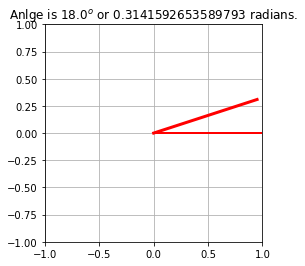

In [68]:
# converting between radians and degrees
def angle_convert_plot():
    
    #get the inputs from the user
    angle = eval( input('What angle to convert?') )
    unit = input('Which unit did you input (radians or degrees)?')
    
    if unit[0].lower() == 'r':
        rad = angle
        deg = np.rad2deg(angle)
    elif unit[0].lower() =='d':
        deg = angle
        rad = np.deg2rad(angle)
    else:
        raise ValueError('Unknown Unit!')
        
    # convert to <360
    
    deg = deg%360
    rad = rad%(2*np.pi)
    
    # make the graph
    plt.plot([0,1],[0,0],'r',linewidth=2)
    plt.plot([0,np.cos(rad)],[0,np.sin(rad)],'r',linewidth=3) 
    plt.axis('square')
    plt.axis([-1,1,-1,1])
    plt.grid()
    plt.title('Anlge is %s$^o$ or %s radians.' %(deg,rad))
    plt.show()
    
# -------- call function----------
angle_convert_plot()

In [45]:
print(base_dia1 * np.pi / z1)

2.9521389086150607


In [13]:
# expected results from cell above (20 teeth)
# these are the pre-determined parameters to test the 'calculated' parameters agains
u1_min = 0
u1_max = .6085
u1_step = 10
u1 = np.linspace(u1_min,u1_max,u1_step)
x1 = 9.3969 * (np.cos(u1) + u1 * np.sin(u1))
y1 = 9.3969 * (np.sin(u1) - u1 * np.cos(u1))

#####  Test Metrics unit 2

In [3]:
# this cell compares metrics from obove cell with same mitrics using 21 teeth
z2 = 21 # number of teeth 
ref_dia2 = 21 # reference diameter
ref_radius2 = ref_dia2 / 2 # reference radius
base_dia2 = 19.7335
base_radius2 = base_dia2 / 2
tip_diameter2 = 32
z2_thickness = 10.2793
pitch2 = (np.pi*ref_dia2) / z2 # pitch
module2 = ref_dia2 / z2 # module
print(module2)

1.0


In [10]:
# expected results from above cell
u2_min = 0
u2_max = .5987
u2_step = 10
u2 = np.linspace(u2_min,u2_max,u2_step)
x2 = 9.8668 * (np.cos(u2) + u2 * np.sin(u2))
y2 = 9.8668 * (np.sin(u2) - u2 * np.cos(u2))

##### Test Metrics Unit 3

In [5]:
# this cell compares metrics from obove cell with same mitrics using 22 teeth
z3 = 22 # number of teeth 
ref_dia3 = 22 # reference diameter
ref_radius3 = ref_dia3 / 2 # reference radius
base_dia3 = 20.6732
base_radius3 = base_dia3 / 2
tip_diameter3 = 24
z1_3_thickness = 9.8879
pitch3 = (np.pi*ref_dia3) / z3 # pitch
module3 = ref_dia3 / z3 # module
print(module3)

1.0


In [11]:
# expected results from above cell
u3_min = 0
u3_max = 0.4986
u3_step = 10
u3 = np.linspace(u3_min,u3_max,u3_step)
x3 = 10.3366 * (np.cos(u3) + u3 * np.sin(u3))
y3 = 10.3366 * (np.sin(u3) - u3 * np.cos(u3))

### Test Metrics Unit 4

In [20]:
# this cell compares metrics from obove cell with same mitrics using 23 teeth
z4 = 23 # number of teeth 
ref_dia4 = 23 # reference diameter
ref_radius4 = ref_dia4 / 2 # reference radius
base_dia4 = 21.6129
base_radius4 = base_dia4 / 2
tip_diameter4 = 25
z4_thickness = 9.5340
pitch4 = (np.pi*ref_dia4) / z4 # pitch
module4 = ref_dia4 / z4 # module
print(module4)

1.0


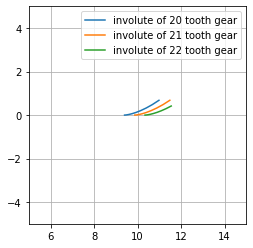

In [17]:
# plotting

# unit one
plt.plot(x1,y1, label='involute of 20 tooth gear')
# plt.plot(base_radius_1*np.cos(u),base_radius_1*np.sin(u),'k-')
# plt.plot((ref_dia1/2)*np.cos(u),(ref_dia1/2)*np.sin(u), color='blue',label='reference diameter')
# plt.plot((tip_diameter_1 / 2)*np.cos(u),(tip_diameter_1 / 2)*np.sin(u),'k-')
# print(x1,y1)

# # unit two
plt.plot(x2,y2, label='involute of 21 tooth gear')
# plt.plot(base_radius_2*np.cos(u),base_radius_2*np.sin(u),'k-')
# plt.plot((ref_dia1_2 / 2)*np.cos(u),(ref_dia1_2 / 2)*np.sin(u), color='blue')
# plt.plot((tip_diameter_2 / 2)*np.cos(u),(tip_diameter_2 / 2)*np.sin(u),'k-')


# unit three
plt.plot(x3,y3, label='involute of 22 tooth gear')
# plt.plot(base_radius_3*np.cos(u),base_radius_3*np.sin(u),'k-')
# plt.plot((tip_diameter_3/2)*np.cos(u),(tip_diameter_3/2)*np.sin(u),'k-')
# plt.plot(ref_radius1_3*np.cos(u),ref_radius1_3*np.sin(u), color='blue')

squares = 50
plt.legend()
plt.axis('square')
plt.grid()
# plt.axis([-squares,squares,-squares,squares])
plt.axis([5,15,-5,5])
plt.show()

In [24]:
print(y1_3)

[0.         0.00106486 0.00851102 0.02868063 0.06783764 0.13212926
 0.22754778 0.35989323 0.5347369  0.75738588]


### Exportation

In [32]:

# this data is reliant on external .txt files to save coordinates too
# change paths as required
y_list = y1
x_list = x1

read_data_x = open("C:\\Users\chris\ChrisdeMontigny\\Nefari0 Repository\Python\Blender\coord_data_x.txt","w")
read_data_y = open("C:\\Users\chris\ChrisdeMontigny\\Nefari0 Repository\Python\Blender\coord_data_y.txt","w")
read_data_z = open("C:\\Users\chris\ChrisdeMontigny\\Nefari0 Repository\Python\Blender\coord_data_z.txt","w")

for i in range(len(x1_3)):
    y_list = read_data_y.write(str(y1_3[i]) + ',')
    x_list = read_data_x.write(str(x1_3[i]) + ',')
#     z_list = read_data_z.write(str(z[i]) + ',')
read_data_y.close()
read_data_x.close()
read_data_z.close()

In [18]:
print(x1_3)

[18.7939     18.82271862 18.90890915 19.05167697 19.24970225 19.50114666
 19.80366285 20.15440642 20.55005058 20.98680325]


In [12]:
# analytics
# this cell displays the index values of the u scales for 
# each gear calculation
for i in range(len(u1)):
    display(Math('%s, \\quad %s, \\quad %s' %(u1[i],u1_2[i],u1_3[i])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
# analytics

diffs1 = (tip_diameter_3-base_dia1_3)-(tip_diameter_2-base_dia1_2)
diffs2 = (tip_diameter_2-base_dia1_2)-(tip_diameter_1-base_dia1)

print(diffs1)
print(diffs2)

0.6031000000000013
0.6031000000000013


#### Test Results

In [14]:
# These test results indicate that the length of the teeth increase by
# .0.6031000000000013 mm when 10 teeth are added to the gear. this 
# quantity can probaby by linearly spaced by 10, and used to efficiently
# calulate tooth length. 

# These results are dependant on a 20 degree pressure angle

###### Calculation Prototyping

In [15]:
# gear one parameters # experimental/default
# this will be the larger gear with 20 teeth
# this cell is contains the imput parameters for gear one. The objective is to use this information to calutate all the parameters of the cell(s) below

# Addendum = 1
# Dedendum = 1.25
# depth = addendum + dedendum

u = np.linspace(0,2*np.pi,200)
z1 = 20 # number of teeth
module_1 = 2

# reference diameter
ref_diameter_1 = z1 * module1
ref_radius_1 = ref_diameter_1 / 2 # reference radius

# tip diameter
tip_diameter_1 = ref_diameter_1 + (2 * module_1)

# base diameter
base_diameter_1 = ref_diameter_1 - (2.5 * module_1)
# base_radius_1 = base_dia1 / 2

# tip_diameter_1 = 22
pitch1 = ref_dia1 / z1 # pitch
z1_thickness = pitch1 / 2 # tooth thickness at base
# module1 = ref_dia1 / z1 # module
print(base_diameter_1)


15.0


In [16]:
# expected results from cell above (20 teeth)
# these are the pre-determined parameters to test the 'calculated' parameters agains
u1_min = 0
u1_max = .6085
u1_step = 10
u1 = np.linspace(u1_min,u1_max,u1_step)
x1 = 9.3969 * (np.cos(u1) + u1 * np.sin(u1))
y1 = 9.3969 * (np.sin(u1) - u1 * np.cos(u1))
.5245
.5471
.5455

0.5455

### Gear 1 Calulation

In [17]:
# gear one parameters # experimental/default
# this will be the larger gear with 20 teeth
# this cell is contains the imput parameters for gear one. The objective is to use this information to calutate all the parameters of the cell(s) below

u = np.linspace(0,2*np.pi,200)
z1 = 20 # number of teeth 
ref_dia1 = 20 # reference diameter
ref_radius1 = ref_dia1 / 2 # reference radius
base_dia1 = 18.7939
base_radius_1 = base_dia1 / 2
z1_thickness = 10.7079 # tooth thickness at base
tip_diameter_1 = 22
pitch1 = (np.pi*ref_dia1) / z1 # pitch
module1 = ref_dia1 / z1 # module
print(module1)

1.0


In [18]:
# expected results from cell above (20 teeth)
# these are the pre-determined parameters to test the 'calculated' parameters agains
u1_min = 0
u1_max = .6085
u1_step = 10
u1 = np.linspace(u1_min,u1_max,u1_step)
x1 = 9.3969 * (np.cos(u1) + u1 * np.sin(u1))
y1 = 9.3969 * (np.sin(u1) - u1 * np.cos(u1))


### Gear 2 Calculation

In [19]:
# gear two parameters # experimental/default
z2 = 10 # number of teeth
ref_dia2 = 10 # reference diameter
pitch2 = (np.pi*ref_dia2) / z2 # pitch
module2 = ref_dia2 / z2 # module
print(module2)

1.0


In [20]:
print(module2)

1.0


In [41]:
# experimental / possible implementation in machine learning

u1_min = 0
u1_max = .6439
u1_step = 10
u1 = np.linspace(u1_min,u1_max,u1_step)
# u1 = np.linspace(0,2*np.pi,200)

x = 7.9874 * (np.cos(u1) + u1 * np.sin(u1))
y = 7.9874 * (np.sin(u1) - u1 * np.cos(u1))

val_string = ''

for i in range(len(x)):
    val_string += str(x[i]) + ','
for i in range(len(y)):
    val_string += str(x[i]) + ','
    
print(val_string)

7.9874,8.007816031455954,8.068750665373484,8.169266193548289,8.307808660313992,8.482221132660586,8.689762145067473,8.9271291867716,9.190487062894663,9.475500925666607,7.9874,8.007816031455954,8.068750665373484,8.169266193548289,8.307808660313992,8.482221132660586,8.689762145067473,8.9271291867716,9.190487062894663,9.475500925666607,
